In [1]:
#importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# importing data
path= r'C:\Users\sdow\Desktop\Boat Analysis'
df= pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'df_clean2.csv'))

In [3]:
df.head()

Unnamed: 0            Boat Type          Manufacturer                 Type  \
0           0          Motor Yacht  Rigiflex power boats  new boat from stock   
1           1  Center console boat     Terhi power boats  new boat from stock   
2           2           Sport Boat    Pioner power boats  new boat from stock   
3           3         Fishing Boat    Linder power boats  new boat from stock   
4           4            Catamaran                  None   Used boat,Unleaded   

   Year Built  Length  Width       Material  Number of views last 7 days  \
0      2017.0    4.00   1.90           None                          226   
1      2020.0    4.00   1.50  Thermoplastic                           75   
2      2020.0    3.00   1.00           None                           64   
3      2019.0    3.55   1.46      Aluminium                           58   
4      1999.0    6.20   2.38      Aluminium                          474   

   EUR_price       Country              City  
0    3370.37  Switzerland       Lake Geneva   
1    3490.00      Germany        Bnningstedt  
2    3367.00      Denmark          Svendborg  
3    3399.00      Germany            Bayern   
4    3636.00  Switzerland    Neuenburgersee

In [4]:
df.dtypes

Unnamed: 0                       int64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                     float64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR_price                      float64
Country                         object
City                            object
dtype: object

In [5]:
df['Year Built'] = df['Year Built'].astype('Int64')
print (df['Year Built'])

0       2017
1       2020
2       2020
3       2019
4       1999
        ... 
8394    1984
8395    1987
8396    2020
8397    2018
8398    2019
Name: Year Built, Length: 8399, dtype: Int64


In [6]:
# Drop the redundant columns and rename columns
df1 = df.drop(['Unnamed: 0'],axis = 1)
df1.rename(columns = {'Number of views last 7 days':'7days_views', 'Year Built':'Year_Built'}, inplace = True)
df1.head()

Boat Type          Manufacturer                 Type  Year_Built  \
0          Motor Yacht  Rigiflex power boats  new boat from stock        2017   
1  Center console boat     Terhi power boats  new boat from stock        2020   
2           Sport Boat    Pioner power boats  new boat from stock        2020   
3         Fishing Boat    Linder power boats  new boat from stock        2019   
4            Catamaran                  None   Used boat,Unleaded        1999   

   Length  Width       Material  7days_views  EUR_price       Country  \
0    4.00   1.90           None          226    3370.37  Switzerland    
1    4.00   1.50  Thermoplastic           75    3490.00      Germany    
2    3.00   1.00           None           64    3367.00      Denmark    
3    3.55   1.46      Aluminium           58    3399.00      Germany    
4    6.20   2.38      Aluminium          474    3636.00  Switzerland    

               City  
0      Lake Geneva   
1       Bnningstedt  
2         Svendborg  
3           Bayern   
4   Neuenburgersee

In [7]:
# Creating a new column with year built as date

df1['date'] = pd.to_datetime(df1.Year_Built.astype(str))

In [8]:
df1.head()

Boat Type          Manufacturer                 Type  Year_Built  \
0          Motor Yacht  Rigiflex power boats  new boat from stock        2017   
1  Center console boat     Terhi power boats  new boat from stock        2020   
2           Sport Boat    Pioner power boats  new boat from stock        2020   
3         Fishing Boat    Linder power boats  new boat from stock        2019   
4            Catamaran                  None   Used boat,Unleaded        1999   

   Length  Width       Material  7days_views  EUR_price       Country  \
0    4.00   1.90           None          226    3370.37  Switzerland    
1    4.00   1.50  Thermoplastic           75    3490.00      Germany    
2    3.00   1.00           None           64    3367.00      Denmark    
3    3.55   1.46      Aluminium           58    3399.00      Germany    
4    6.20   2.38      Aluminium          474    3636.00  Switzerland    

               City       date  
0      Lake Geneva  2017-01-01  
1       Bnningstedt 2020-01-01  
2         Svendborg 2020-01-01  
3           Bayern  2019-01-01  
4   Neuenburgersee  1999-01-01

In [9]:
# Creating a new dataframe with median views in last 7 days grouped by dates

data = df1.groupby('date').agg({'7days_views': ['median']})

In [10]:
data

7days_views
                median
date                  
1885-01-01       160.0
1889-01-01        83.0
1895-01-01        33.0
1897-01-01       119.0
1898-01-01        25.0
...                ...
2017-01-01       102.0
2018-01-01        95.0
2019-01-01       105.0
2020-01-01       109.0
2021-01-01       192.0

[120 rows x 1 columns]

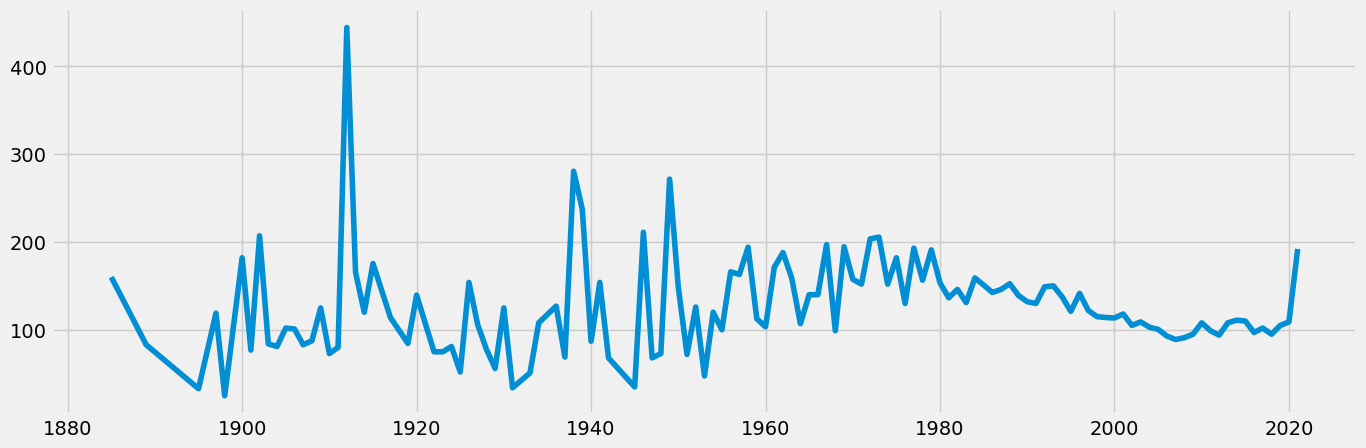

In [11]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [12]:
# Creating a new dataframe with median length grouped by dates
data1 = df1.groupby('date').agg({'Length': ['median']})

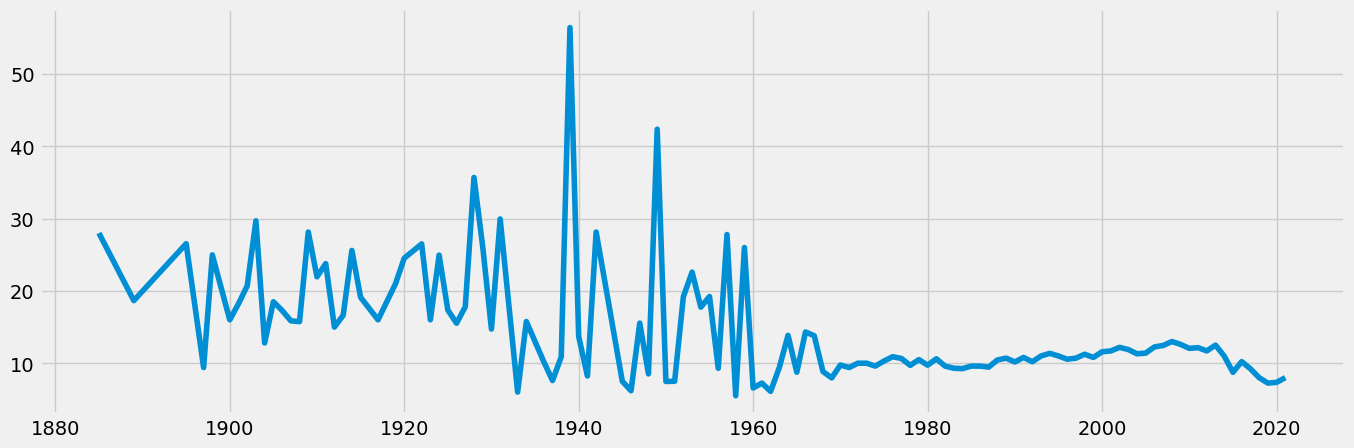

In [13]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data1)

In [14]:
data.shape

(120, 1)

In [15]:
data.columns

MultiIndex([('7days_views', 'median')],
           )

In [16]:
data_2=data.reset_index()

In [17]:
data_2.head()

date 7days_views
                  median
0 1885-01-01       160.0
1 1889-01-01        83.0
2 1895-01-01        33.0
3 1897-01-01       119.0
4 1898-01-01        25.0

In [18]:
data_sub=data_2.loc[(data_2['date']>'1950-01-01') & (data_2['date'] <'2021-01-01')]

In [19]:
# Setting the date as the index
from datetime import datetime
data_sub['datetime']=pd.to_datetime(data_sub['date']) # create a datetime column from 'date'
data_sub=data_sub.set_index('datetime') # set the datetime as the index of the data frame
data_sub.drop(['date'], axis=1, inplace=True) # drop the 'date' column
data_sub.head()

7days_views
                median
datetime              
1951-01-01        72.0
1952-01-01       126.0
1953-01-01        47.5
1954-01-01       120.0
1955-01-01       100.0

In [20]:
# Decomposing time series using 

decomp = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [21]:
# Defining a fixed size for all special charts

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

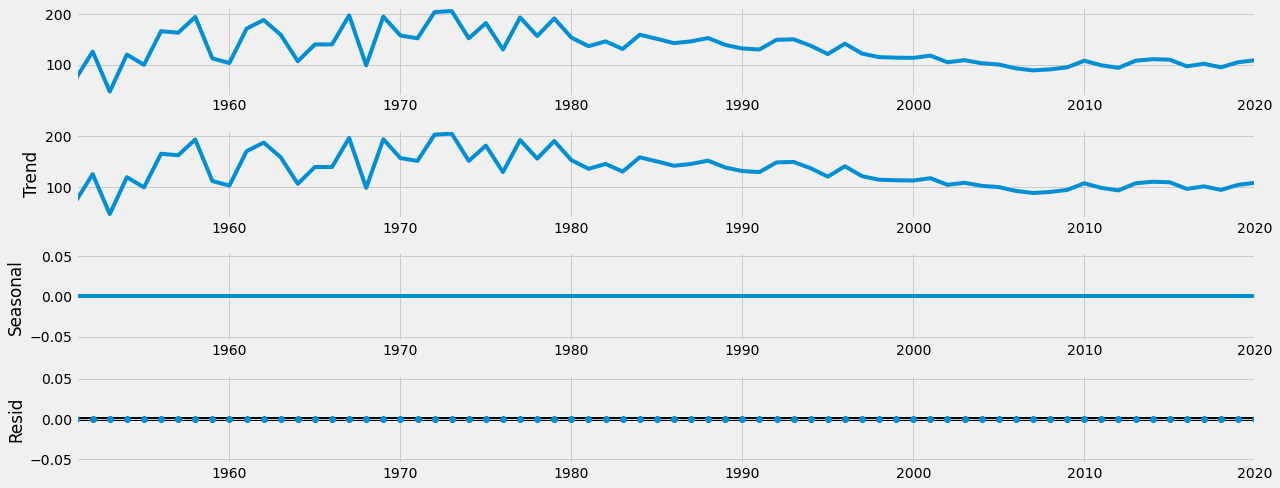

In [22]:
# Plotting decomposition of time-series data

decomp.plot()
plt.show()

# Decomposition interpretation shows there there is no seasonality, this may be due the fact the data is all based on year, the trends show fluctuations between 1950 around 1990 where the # of views in thelast seven days levels off.


In [23]:
# Dickey Fuller testing

In [24]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_2['7days_views'])

Dickey-Fuller Stationarity test:
Test Statistic                  -4.503592
p-value                          0.000194
Number of Lags Used              3.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


# p value is less tha 0.05 and therefor signficant.  The test statistic is also less than the critical values and therefor we can reject the null.  The data is stationary.

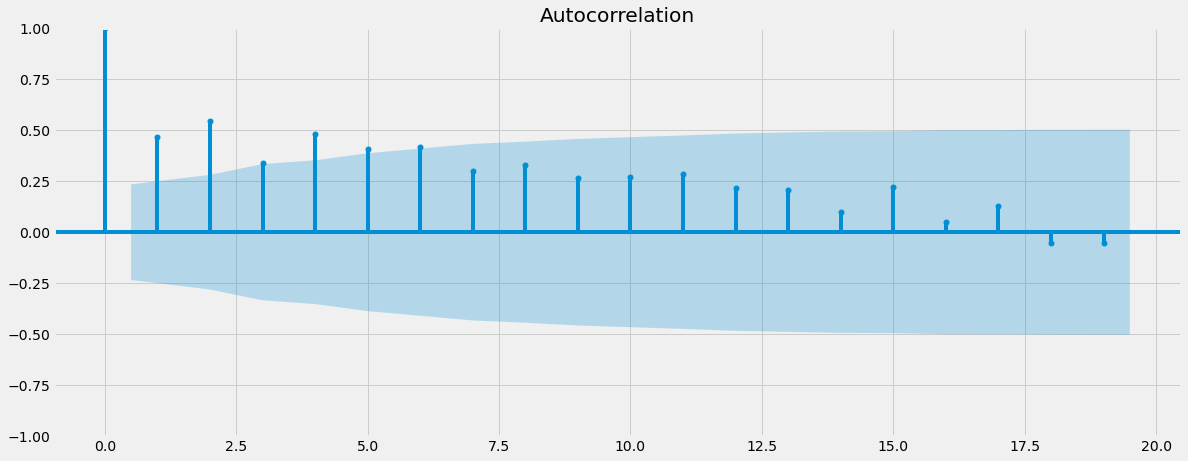

In [25]:
# Autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()